# **Heart Disease Prediction**

Goal is to develop a predictive model capable of accurately identifying individuals with heart disease.

In [7]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import metrics, tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [8]:
df=pd.read_csv('/content/sample_data/heart.csv')

#Dataset Overview

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#Dataset Description

Dataset Description

age	Age of the patient in years

sex	Gender of the patient (0 = male, 1 = female)

cp	Chest pain type:
0: Typical angina
1: Atypical angina
2: Non-anginal pain
3: Asymptomatic

trestbps	Resting blood pressure in mm Hg

chol	Serum cholesterol in mg/dl

fbs	Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false)

restecg	Resting electrocardiographic results:
0: Normal
1: Having ST-T wave abnormality
2: Showing probable or definite left ventricular hypertrophy

thalach	Maximum heart rate achieved during a stress test

exang	Exercise-induced angina (1 = yes, 0 = no)

oldpeak	ST depression induced by exercise relative to rest
slope	Slope of the peak exercise ST segment:
0: Upsloping
1: Flat
2: Downsloping

ca	Number of major vessels (0-4) colored by fluoroscopy

thal	Thalium stress test result:
0: Normal
1: Fixed defect
2: Reversible defect
3: Not described
target	Heart disease status (0 = no disease, 1 = presence of disease)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No null values in dataset.

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Univariate Analysis

#Plotting bar plots for categorical columns

In [12]:
 categorical_features= ['sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'ca', 'thal', 'target']

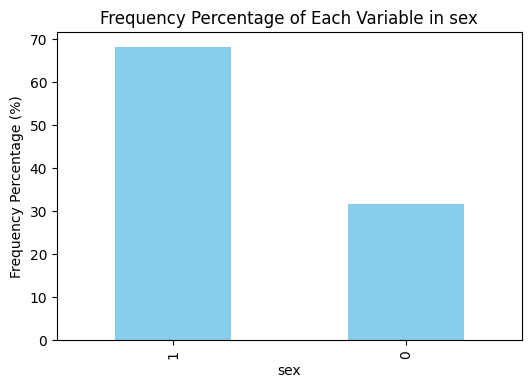

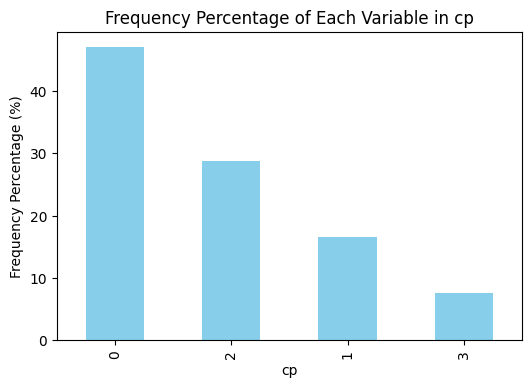

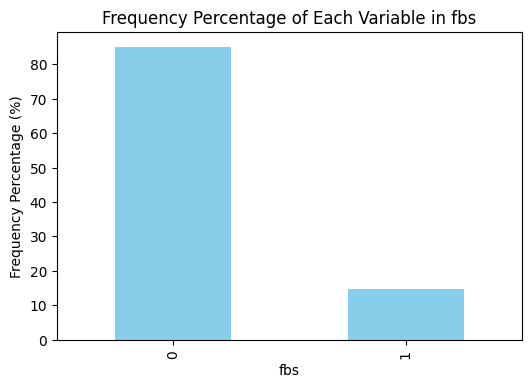

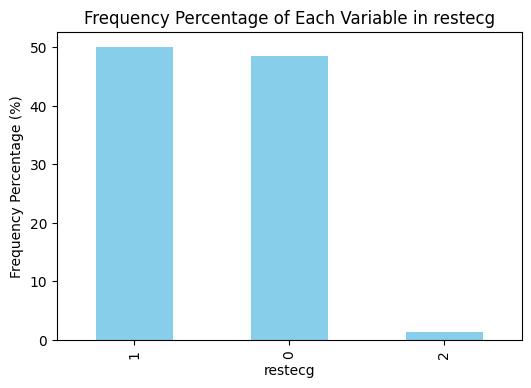

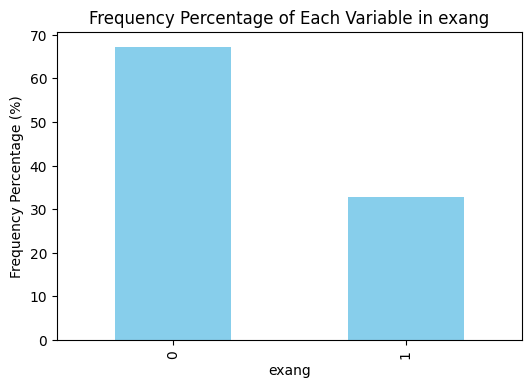

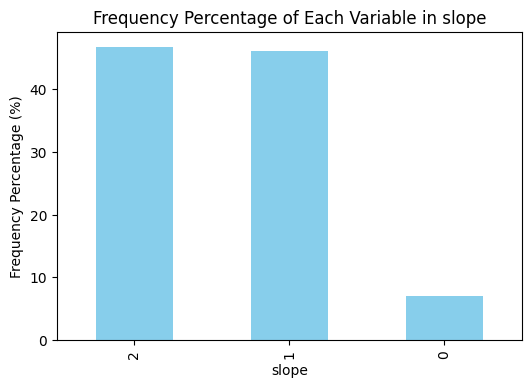

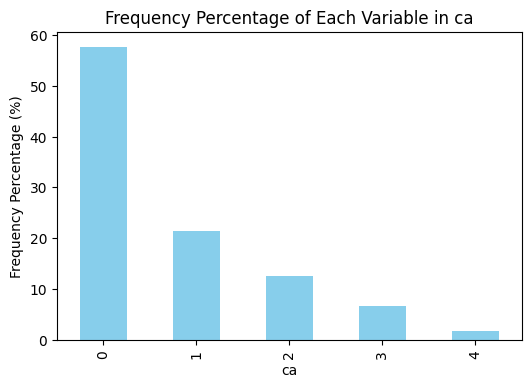

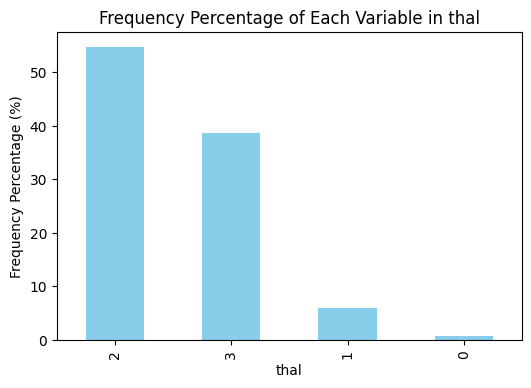

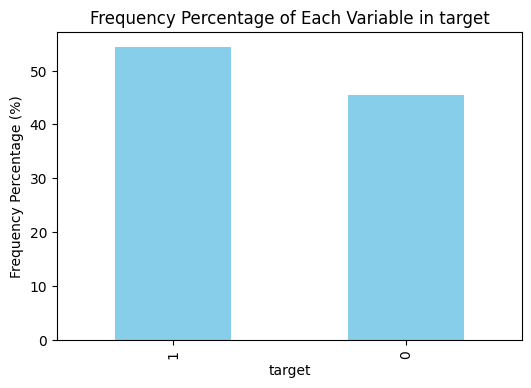

In [53]:
for column in categorical_features:
    frequency_percentage = df[column].value_counts(normalize=True) * 100
    plt.figure(figsize=(6, 4))
    frequency_percentage.plot(kind='bar', color='skyblue')
    plt.title(f'Frequency Percentage of Each Variable in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency Percentage (%)')
    plt.show()

# Plotting Histogram for numerical columns

In [14]:
int_columns = df.select_dtypes(include='int').columns.tolist()

In [15]:
print(int_columns)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal', 'target']


In [16]:
int_columns=['age', 'trestbps', 'chol', 'thalach']

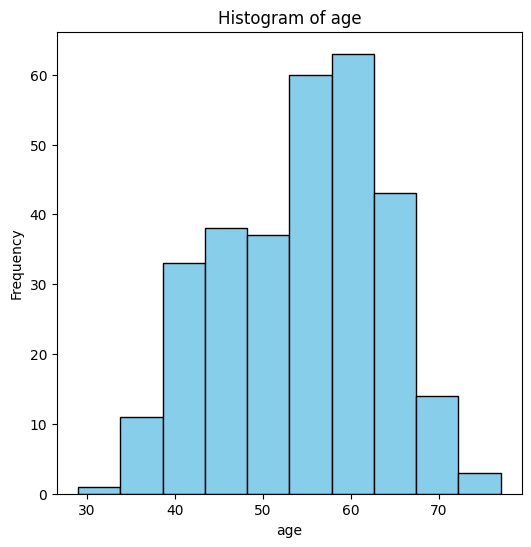

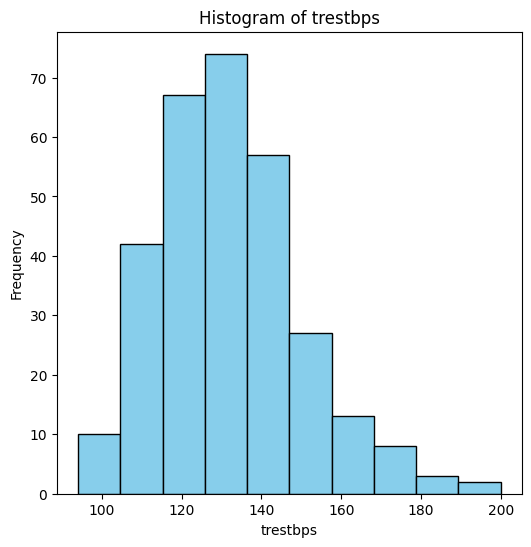

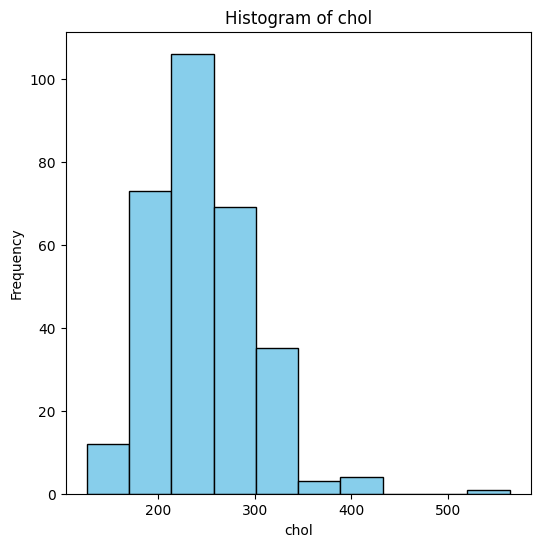

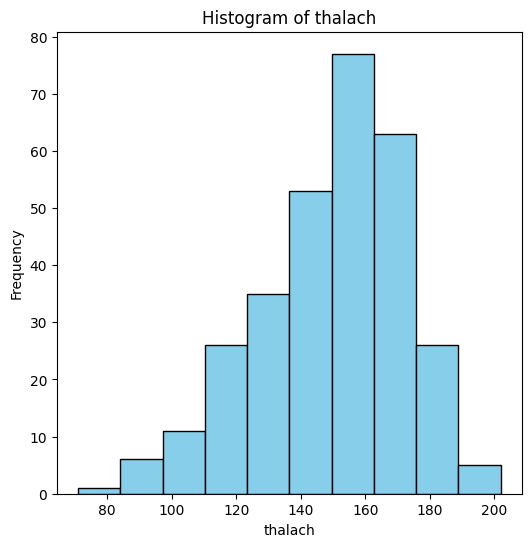

In [17]:
for column in int_columns:
    plt.figure(figsize=(6, 6))
    df[column].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Checking missing values in dataset

In [18]:
df.isnull().sum().sum()

0

## One hot encoding of nominal variables

Nominal variables have no inherent order.They should be one hot encoded because using them as numbers might introduce an unintended order to the model.

In [19]:
Encoded_Nominal_features= ['cp','restecg','thal']

In [20]:
df_encoded = pd.get_dummies(df, columns=Encoded_Nominal_features, dtype='int')

In [21]:
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,...,1,0,0,1,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,2,0,...,1,0,0,0,1,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,...,0,0,0,0,1,0,0,0,1,0


## Applying different machine learning model

# Decision Tree Model Building

In [22]:
df_encoded.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [23]:
X=df_encoded[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca','cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'thal_0', 'thal_1', 'thal_2', 'thal_3']].values

In [24]:
Y=df_encoded['target'].values

In [25]:
Y[0:5]

array([1, 1, 1, 1, 1])

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 21)
(61, 21)
(242,)
(61,)


In [28]:
TargetTree=DecisionTreeClassifier(criterion='entropy',max_depth=5)
TargetTree

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [29]:
TargetTree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [30]:
Yhat=TargetTree.predict(X_test)

In [31]:
metrics.accuracy_score(Y_test,Yhat)

0.819672131147541

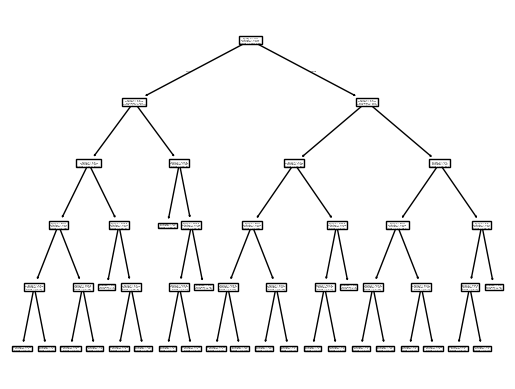

In [32]:
tree.plot_tree(TargetTree)
plt.show()

In [33]:
Report_DecisionTree=metrics.classification_report(Y_test,Yhat)
print(Report_DecisionTree)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



# K-Nearest Neighbour Model

In [34]:
X=df_encoded[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca','cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'thal_0', 'thal_1', 'thal_2', 'thal_3']].values

In [35]:
Y=df_encoded['target'].values

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [37]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
neighbors=KNeighborsClassifier(n_neighbors=6)


In [39]:
neighbors.fit(X_train_scaled,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [40]:
Yhat=neighbors.predict(X_test_scaled)

In [41]:
metrics.accuracy_score(Y_test,Yhat)

0.819672131147541

In [42]:
Report_KNN=metrics.classification_report(Y_test,Yhat)
print(Report_KNN)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



# Support Vector Machine Model

In [43]:
X=df_encoded[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca','cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'thal_0', 'thal_1', 'thal_2', 'thal_3']].values

In [44]:
Y=df_encoded['target'].values

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [46]:
SVM=SVC(kernel='linear',degree=2)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
SVM.fit(X_train_scaled,Y_train)

SVC(degree=2, kernel='linear')

In [49]:
Yhat=SVM.predict(X_test_scaled)

In [50]:
accuracy_score(Y_test,Yhat)

0.8688524590163934

In [51]:
Report_SVM=metrics.classification_report(Y_test,Yhat)
print(Report_SVM)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



The SVM model demonstrates highest capability in recognizing potential heart patients with the F-1 score of 0.87.